In [1]:
import cv2
from bag_reader.bag_reader import BagReader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [3]:
data = BagReader('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-11-06-19-06-55.bag')
data.get_data()

[INFO]  Data folder /home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-11-06-19-06-55 already exists. Not creating.
[INFO]  Bag already exported, Reading data ...


In [18]:
disp = np.load(data.disparity_df.np_path[32])
#np.nan_to_num(disp,0)
print(disp)

[[       nan        nan        nan ... -20.936905 -20.938334 -20.99119 ]
 [       nan        nan        nan ... -20.909105 -20.936718 -20.89028 ]
 [       nan        nan        nan ... -20.908676 -20.890171 -20.873898]
 ...
 [       nan        nan        nan ... -65.77062  -65.85191  -65.8519  ]
 [       nan        nan        nan ... -65.78886  -65.97724  -66.0183  ]
 [       nan        nan        nan ... -65.704605 -65.78886  -66.02044 ]]


In [35]:
min_disp = data.disparity_df.min_disparity[50]
print(min_disp)
max_disp = data.disparity_df.max_disparity[50]
print(max_disp)



-75.659423828125
-2.112947463989258


[[       nan        nan        nan ... -20.936905 -20.938334 -20.99119 ]
 [       nan        nan        nan ... -20.909105 -20.936718 -20.89028 ]
 [       nan        nan        nan ... -20.908676 -20.890171 -20.873898]
 ...
 [       nan        nan        nan ... -65.77062  -65.85191  -65.8519  ]
 [       nan        nan        nan ... -65.78886  -65.97724  -66.0183  ]
 [       nan        nan        nan ... -65.704605 -65.78886  -66.02044 ]]

[[      nan       nan       nan ... 54.72252  54.721092 54.668236]
 [      nan       nan       nan ... 54.75032  54.722706 54.769142]
 [      nan       nan       nan ... 54.750748 54.769253 54.785526]
 ...
 [      nan       nan       nan ...  9.888802  9.80751   9.807526]
 [      nan       nan       nan ...  9.870567  9.682182  9.641121]
 [      nan       nan       nan ...  9.954819  9.870567  9.638985]]
73.54648
[[       nan        nan        nan ... 189.73366  189.72871  189.54546 ]
 [       nan        nan        nan ... 189.83005  189.73431  189.

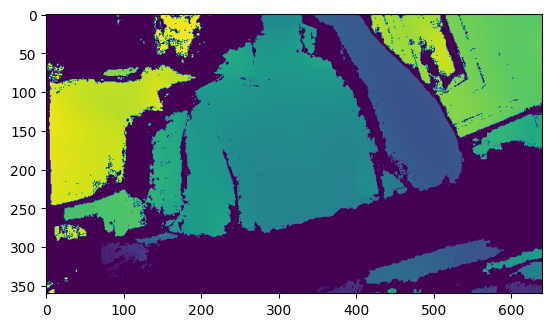

In [40]:
disp_cv = disp.copy()
print(disp_cv)
print("")
shiftedDisparity = (disp_cv - min_disp)
print(shiftedDisparity)
print(np.nanmax(shiftedDisparity))
scaledDisparity = (shiftedDisparity*255)/np.nanmax(shiftedDisparity)
print(scaledDisparity)
scaledDisparity = np.clip(scaledDisparity,0,255)


scaledDisparity = scaledDisparity.astype(np.uint8)
print(scaledDisparity)
cv2.imwrite("asd.jpg",scaledDisparity)

plt.imshow(scaledDisparity)

[[[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [255 136   0]
  [255 136   0]
  [255 136   0]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [255 136   0]
  [255 136   0]
  [255 136   0]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [255 136   0]
  [255 136   0]
  [255 136   0]]

 ...

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [  0   8 255]
  [  0   8 255]
  [  0   8 255]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [  0   8 255]
  [  0   4 255]
  [  0   4 255]]

 [[  0   0 128]
  [  0   0 128]
  [  0   0 128]
  ...
  [  0   8 255]
  [  0   8 255]
  [  0   4 255]]]


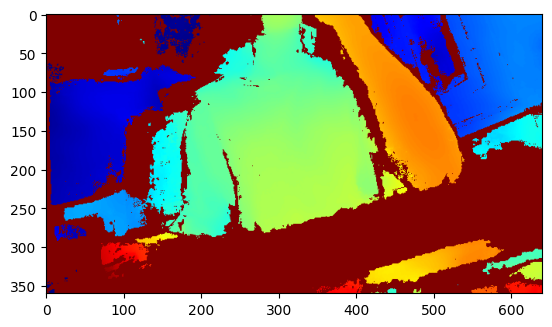

In [15]:
heat = cv2.applyColorMap(scaledDisparity,cv2.COLORMAP_JET)
plt.imshow(heat)
heat = cv2.cvtColor(heat, cv2.COLOR_BGR2RGB)
cv2.imwrite("asd.jpg",heat)
print(heat)

